In [ ]:
import os
import pandas as pd

folder_path = "/content/results"

dataframes = []

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['model'] = filename[:-4]
        dataframes.append(df)

# Combine all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

df = combined_df.reset_index(drop=True)

In [ ]:
df['rank'] = df['rank'].replace(['The ambiguity score for this question is 2.', 'Score: 2'], 2)
df['rank'] = df['rank'].astype(int)

In [ ]:
df['rank'].unique()

array([3, 5, 2, 1, 4])

In [ ]:
df.groupby('model')['rank'].value_counts().unstack(fill_value=0)

rank,1,2,3,4,5
model,,,,,
results_of_base-model,14,11,51,35,20
results_of_best_model,3,9,52,48,19
results_of_checkpoint-10,12,12,59,36,12
results_of_checkpoint-100,5,13,55,43,15
results_of_checkpoint-20,6,13,50,38,24
results_of_checkpoint-30,7,15,47,39,23
results_of_checkpoint-40,7,11,52,46,15
results_of_checkpoint-50,6,12,46,52,15
results_of_checkpoint-60,10,11,50,34,26


In [ ]:
rank_counts = df.pivot_table(index='model', columns='rank', aggfunc='size', fill_value=0)

# Sort by ranks starting from highest (5, 4, 3, 2, 1)
sorted_models = rank_counts.sort_values(by=[5, 4, 3, 2, 1], ascending=False)

# Reset index for better readability
sorted_models = sorted_models.reset_index()

# Display the sorted result
print(sorted_models)

rank                      model   1   2   3   4   5
0      results_of_checkpoint-60  10  11  50  34  26
1      results_of_checkpoint-20   6  13  50  38  24
2      results_of_checkpoint-30   7  15  47  39  23
3      results_of_checkpoint-80   6   8  53  44  20
4         results_of_base-model  14  11  51  35  20
5      results_of_checkpoint-70   3  19  40  50  19
6         results_of_best_model   3   9  52  48  19
7      results_of_checkpoint-50   6  12  46  52  15
8      results_of_checkpoint-40   7  11  52  46  15
9     results_of_checkpoint-100   5  13  55  43  15
10     results_of_checkpoint-90   8  10  54  46  13
11     results_of_checkpoint-10  12  12  59  36  12


In [ ]:
accepted_ranks = [4, 5]
rejected_ranks = [1, 2, 3]

# Count the number of accepted ranks per model
df['accepted'] = df['rank'].isin(accepted_ranks).astype(int)  # Mark 1 for accepted, 0 otherwise
accepted_counts = df.groupby('model')['accepted'].sum()

# Order models by descending number of accepted ranks
sorted_models = accepted_counts.sort_values(ascending=False).reset_index()
sorted_models.columns = ['model', 'accepted_count']

# Display the sorted DataFrame
print(sorted_models)

                        model  accepted_count
0    results_of_checkpoint-70              69
1       results_of_best_model              67
2    results_of_checkpoint-50              67
3    results_of_checkpoint-80              64
4    results_of_checkpoint-20              62
5    results_of_checkpoint-30              62
6    results_of_checkpoint-40              61
7    results_of_checkpoint-60              60
8    results_of_checkpoint-90              59
9   results_of_checkpoint-100              58
10      results_of_base-model              55
11   results_of_checkpoint-10              48


In [ ]:
rank_counts = df.pivot_table(index='id', columns='rank', aggfunc='size', fill_value=0)

# Sort by ranks starting from highest (5, 4, 3, 2, 1)
sorted_q_models = rank_counts.sort_values(by=[5, 4, 3, 2, 1], ascending=False)

# Reset index for better readability
sorted_q_models = sorted_q_models.reset_index()
sorted_q_models

rank,id,1,2,3,4,5
0,OIC-257-02-B,0,0,0,3,9
1,OIC-049-12-B,0,0,3,3,6
2,OIC-076-18-B,0,0,3,3,6
3,OIC-328-01-A,0,0,1,6,5
4,OIC-076-09-A,0,1,3,3,5
...,...,...,...,...,...,...
126,OIC-076-14-B,0,1,10,1,0
127,OIC-005-07-A,0,2,9,1,0
128,OIC-076-15-A,1,1,9,1,0
129,OIC-049-22-B,3,5,3,1,0


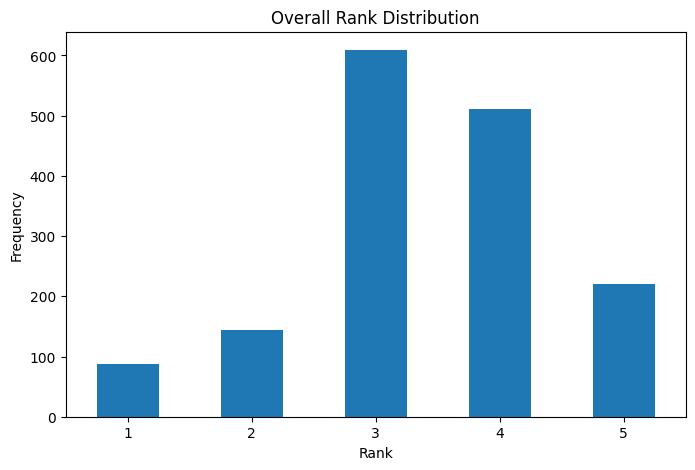

In [ ]:
import matplotlib.pyplot as plt

rank_counts = df.pivot_table(index='id', columns='rank', aggfunc='size', fill_value=0)

# Summarize the overall distribution of ranks
overall_distribution = df['rank'].value_counts().sort_index()

# Visualize the overall rank distribution
plt.figure(figsize=(8, 5))
overall_distribution.plot(kind='bar')
plt.title("Overall Rank Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

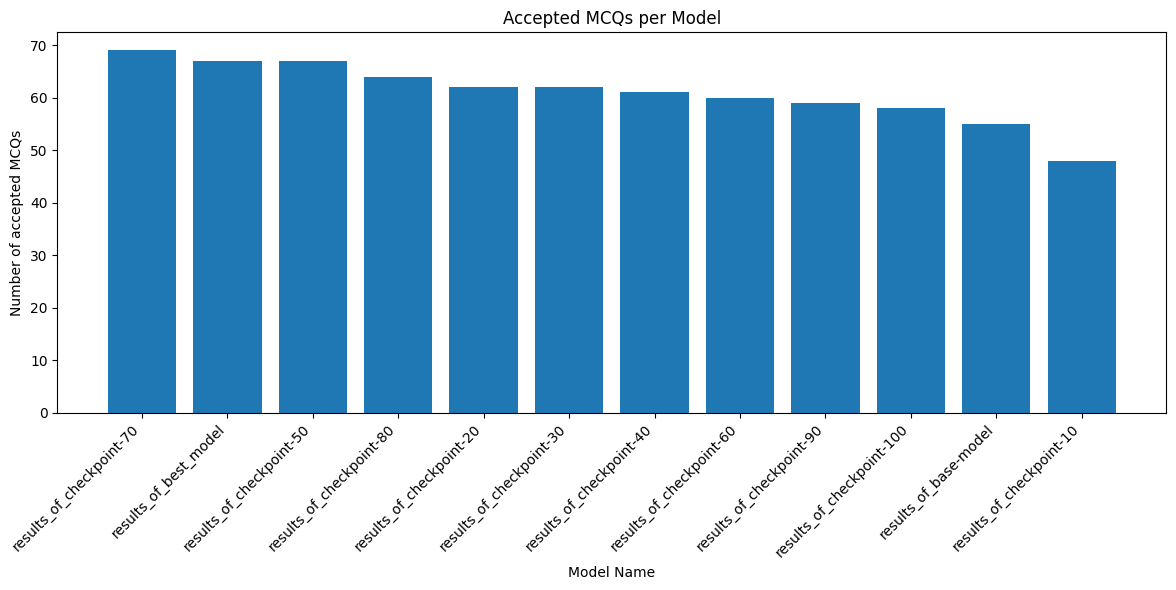

In [ ]:
# Plotting with clipped Y-axis
plt.figure(figsize=(12, 6))
plt.bar(sorted_models['model'], sorted_models['accepted_count'])
plt.xticks(rotation=45, ha='right')
plt.title("Accepted MCQs per Model")
plt.xlabel("Model Name")
plt.ylabel("Number of accepted MCQs")
# plt.ylim(105, max(sorted_models['accepted_count']) + 5)  # Clip Y-axis starting from 105
plt.tight_layout()
plt.show()
